In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import tensorflow as tf
import neurokit2 as nk

from read_record import Record,RecordReader
from scanning_window import scan_record
from collections import Counter

import matplotlib.pyplot as plt
from neurokit2 import ecg_clean

In [41]:
folder_path="D:/CPSC2021/Training_set_II"
file_name="data_89_13"
reading_record=RecordReader.read(folder_path,file_name,0,0,None)

In [42]:
reading_record._Record__label

'non atrial fibrillation'

In [ ]:
Counter(reading_record._Record__aux)

In [43]:
test_scan=scan_record(reading_record,window_width=30)
test_scan

There are 1598 segments in the record.


,0,1,2,3,4,5,6,7,8,9,...,5998,5999,beat_annotation_symbols,annotated_samples,parent_record,pac_percent,pvc_percent,avg_heart_rate,label,true_class
0,4.965012,4.992005,4.990020,4.947029,4.890028,4.885027,4.872008,4.867007,4.885027,4.880025,...,4.925001,4.937027,"[N, N, N, A, N, N, N, A, A, N, A, A, N, A, A, ...","[30, 197, 294, 384, 547, 699, 792, 883, 1029, ...",data_89_13,57.446809,0.0,72,non atrial fibrillation,PAC
1,4.885027,4.887012,4.892014,4.897015,4.915035,4.927024,4.942028,5.005024,5.030031,5.040034,...,4.895029,4.887012,"[N, A, N, N, N, A, A, N, A, A, N, A, A, A, A, ...","[54, 144, 307, 459, 552, 643, 789, 881, 969, 1...",data_89_13,58.695652,0.0,72,non atrial fibrillation,PAC
2,4.877010,4.870022,4.877010,4.877010,4.880025,4.892014,4.885027,4.887012,4.872008,4.877010,...,4.900031,4.900031,"[N, N, N, A, A, N, A, A, N, A, A, A, A, A, A, ...","[67, 219, 312, 403, 549, 641, 729, 883, 968, 1...",data_89_13,57.777778,0.0,72,non atrial fibrillation,PAC
3,5.072028,5.072028,5.070006,5.082031,5.087032,5.087032,5.091997,5.099977,5.102000,5.111966,...,4.880025,4.870022,"[N, A, A, N, A, A, N, A, A, A, A, A, A, A, A, ...","[72, 163, 309, 401, 489, 643, 728, 812, 921, 1...",data_89_13,57.777778,0.0,72,non atrial fibrillation,PAC
4,5.045035,5.060003,5.045035,5.037018,5.045035,5.042020,5.037018,5.030031,5.000022,4.970014,...,4.905032,4.907018,"[A, N, A, A, N, A, A, A, A, A, A, A, A, A, A, ...","[69, 161, 249, 403, 488, 572, 681, 837, 984, 1...",data_89_13,57.777778,0.0,72,non atrial fibrillation,PAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,4.892014,4.887012,4.887012,4.890028,4.885027,4.880025,4.885027,4.880025,4.887012,4.882011,...,4.962034,4.970014,"[N, N, N, N, N, N, N, N, N, N, A, N, N, N, N, ...","[97, 297, 492, 677, 864, 1044, 1217, 1391, 156...",data_89_13,19.444444,0.0,72,non atrial fibrillation,NSR
1594,4.865021,4.860019,4.862005,4.855018,4.860019,4.857004,4.855018,4.860019,4.862005,4.855018,...,4.912020,4.915035,"[N, N, N, N, N, N, N, N, N, A, N, N, N, N, N, ...","[57, 252, 437, 624, 804, 977, 1151, 1323, 1494...",data_89_13,24.324324,0.0,72,non atrial fibrillation,PAC
1595,4.840014,4.840014,4.852002,4.857004,4.880025,4.917021,5.020028,5.144990,5.239980,5.251969,...,5.176984,5.186987,"[N, N, N, N, N, N, N, N, A, N, N, N, N, N, N, ...","[12, 197, 384, 564, 737, 911, 1083, 1254, 1356...",data_89_13,24.324324,0.0,72,non atrial fibrillation,PAC
1596,5.119983,5.126970,5.144990,5.156979,5.164996,5.174999,5.181986,5.176984,5.184965,5.174999,...,4.870022,4.875024,"[N, N, N, N, N, N, A, N, N, N, N, N, N, A, N, ...","[144, 324, 497, 671, 843, 1014, 1116, 1318, 14...",data_89_13,25.000000,0.0,72,non atrial fibrillation,PAC


In [35]:
Counter(test_scan.true_class)

Counter({'NSR': 1154, 'PAC': 222, 'Pure_NSR': 11, 'Others': 3})

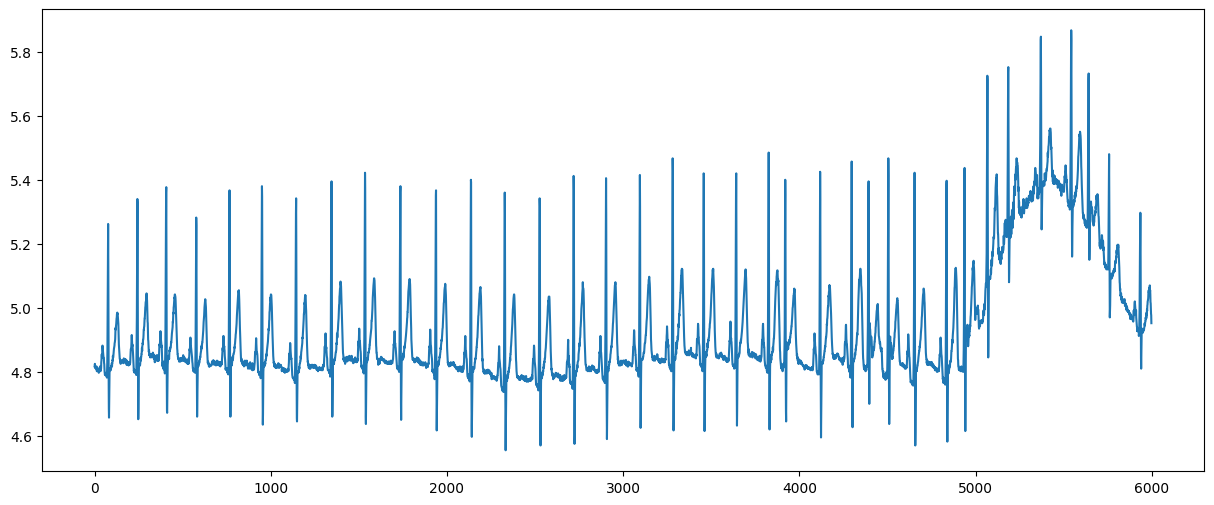

In [44]:
plt.figure(figsize=(15,6))
plt.plot(list(test_scan.iloc[431][0:5999]))

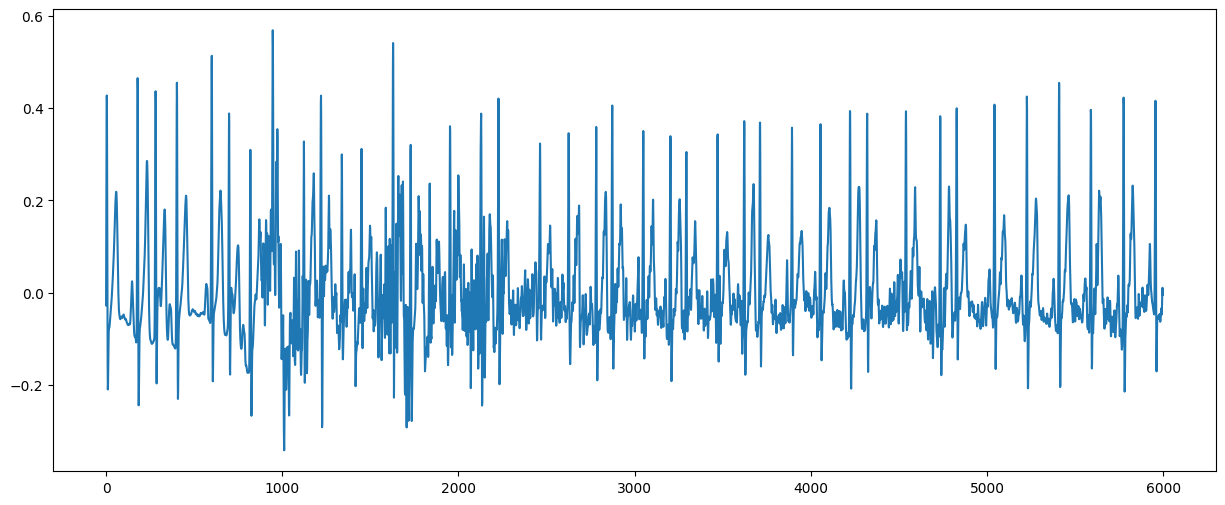

In [45]:
signal=np.array(list(test_scan.iloc[98][0:5999]))
clean_signal=nk.ecg_clean(signal,200)
plt.figure(figsize=(15,6))
plt.plot(clean_signal)


In [ ]:
test_scan.to_csv("Data_104_21_Raw")

In [ ]:
# Filter the DataFrame for rows where 'true_class' is 'pac'
pac_df = test_scan[test_scan['true_class'] == 'PAC']

# Save the filtered DataFrame to a CSV file
pac_df.to_csv('data_104_21_pac.csv', index=False)

In [38]:
# Select rows from 30 to 60 (note that the end index is exclusive)
selected_rows = test_scan.iloc[ 6:775]
# Save the selected rows to a CSV file
selected_rows.to_csv('data_89_13_pac.csv', index=False)